In [1]:
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tiobe_index

In [2]:
def df_tiobe_index(language):
    df = pd.read_csv('./data/{}.csv'.format(language))
    df.index = pd.to_datetime(df['date'], format='%Y-%m-%d')
    df.rename(columns={'ratings': language}, inplace=True)
    del df['date']
    return df

def show_tiobe_index(df):
    cmap = plt.get_cmap('jet')
    colors = cmap(np.linspace(0, 1.0, 20))
    df.plot(color=colors)
    plt.title('tiobe indexes')
    plt.xlabel('date')
    plt.ylabel('ratings (%)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

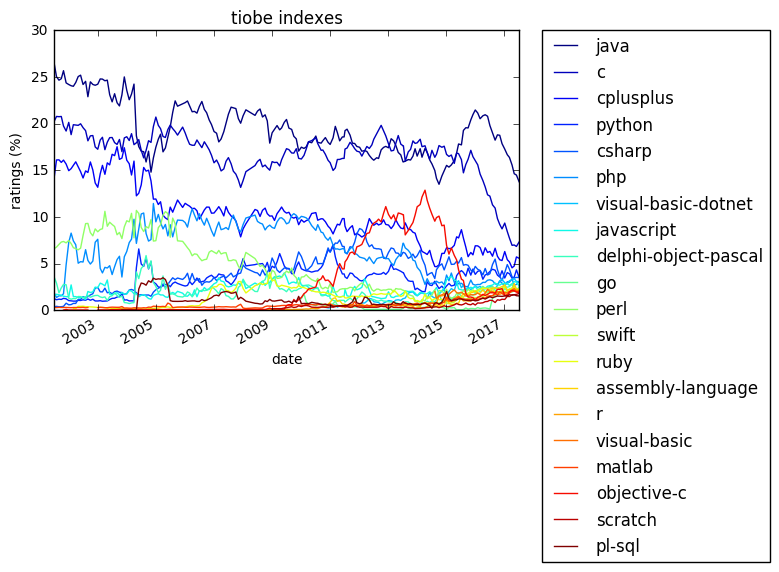

In [3]:
dfs = list()
for language in tiobe_index.languages:
    dfs.append(df_tiobe_index(language))

df = pd.concat(dfs, axis=1)
df.sort_index(inplace=True)
show_tiobe_index(df)

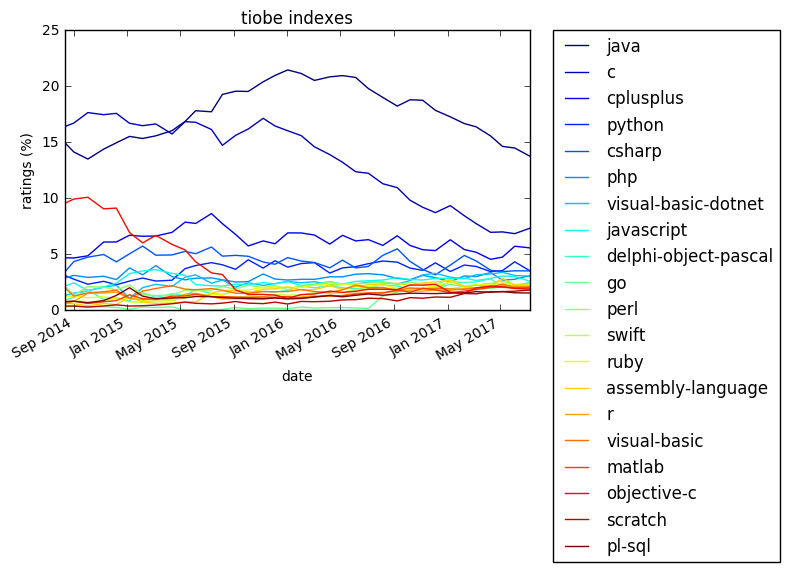

In [4]:
df_wna = df.dropna()
show_tiobe_index(df_wna)